**Final Project Task 2 -Census Data EDA**

Requirements

Analyze hours-per-week Target Distribution

Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.
Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

Check for missing values and report the number and percentage of missing data for each column.

Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

Generate bar plots for at least three categorical columns and discuss the frequency distributions.

Identify outliers in at least one numerical column using boxplots.

Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

Others? - Optional

Deliverable:

Notebook code with no errors.
Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
Be sure to discuss the findings and add a summary report

In [32]:
import pandas as pd

In [33]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age     workclass  fnlwgt     education  education-num  \
23102   20       Private  124751  Some-college             10   
5098    39  Self-emp-inc  114844   Prof-school             15   
22783   50  Self-emp-inc  194514       Masters             14   
20556   38       Private  119992  Some-college             10   
1962    50       Private  147629       Masters             14   
24065   36       Private   68273     Bachelors             13   
16565   35       Private  347491     Assoc-voc             11   
15199   43   Federal-gov  192712  Some-college             10   
19125   19       Private   86860  Some-college             10   
2048    28       Private  303954       HS-grad              9   

           marital-status       occupation   relationship   race     sex  \
23102       Never-married     Adm-clerical      Own-child  White  Female   
5098   Married-civ-spouse   Prof-specialty        Husband  White    Male   
22783       Never-married   Prof-specialty  Not-in-family  Black    Male   
20556  Married-civ-spouse   Prof-specialty        Husband  White    Male   
1962   Married-civ-spouse   Prof-specialty        Husband  White    Male   
24065  Married-civ-spouse            Sales        Husband  White    Male   
16565       Never-married     Craft-repair  Not-in-family  White    Male   
15199  Married-civ-spouse   Prof-specialty           Wife  White  Female   
19125       Never-married  Exec-managerial      Own-child  White    Male   
2048   Married-civ-spouse     Craft-repair        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week   native-country income  
23102             0             0              24    United-States  <=50K  
5098          99999             0              65    United-States   >50K  
22783             0             0              50  Trinadad&Tobago  <=50K  
20556             0             0              40    United-States  <=50K  
1962          15024             0              45    United-States   >50K  
24065             0             0              40    United-States   >50K  
16565             0             0              40    United-States  <=50K  
15199             0             0              40    United-States   >50K  
19125             0             0              15    United-States  <=50K  
2048              0          1848              42    United-States   >50K

In [34]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Data load
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

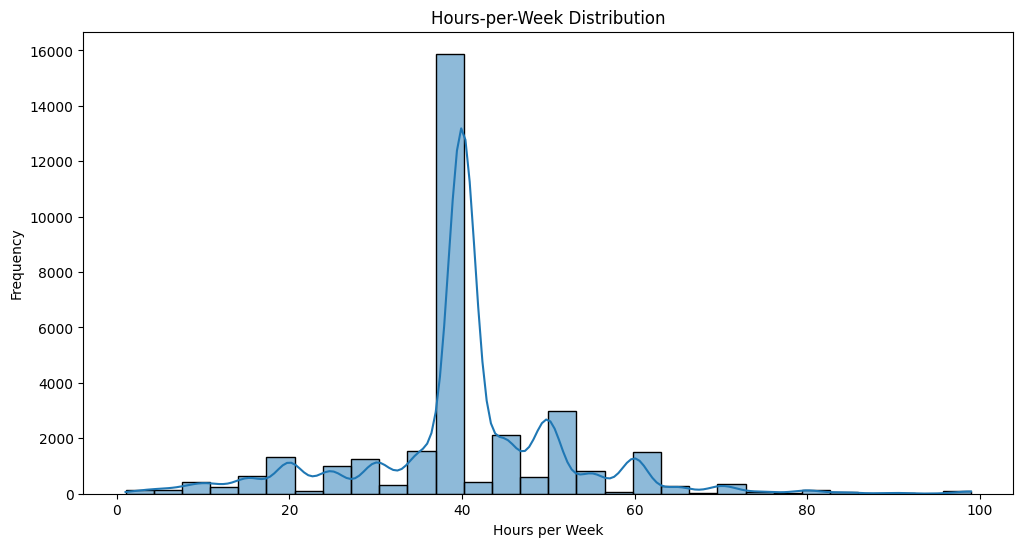

In [36]:
# Distribution of "hours-per-week" through visualizations

plt.figure(figsize=(12, 6))
sns.histplot(data['hours-per-week'], kde=True, bins=30)
plt.title('Hours-per-Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Summary of dataset using descriptive statistics
summary_stats = data['hours-per-week'].describe()
mean_value = data['hours-per-week'].mean()
median_value = data['hours-per-week'].median()
std_dev = data['hours-per-week'].std()

print("Summary Statistics for hours-per-week:")
print(summary_stats)
print(f"\nMean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Summary Statistics for hours-per-week:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Mean: 40.44
Median: 40.00
Standard Deviation: 12.35


In [38]:
#Status of missing data

missing_data = data.isnull().sum()
missing_percentage = (missing_data / data.shape[0]) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
print("\nMissing Data Information:")
print(missing_info)


Missing Data Information:
                Missing Values  Percentage
age                          0         0.0
workclass                    0         0.0
fnlwgt                       0         0.0
education                    0         0.0
education-num                0         0.0
marital-status               0         0.0
occupation                   0         0.0
relationship                 0         0.0
race                         0         0.0
sex                          0         0.0
capital-gain                 0         0.0
capital-loss                 0         0.0
hours-per-week               0         0.0
native-country               0         0.0
income                       0         0.0


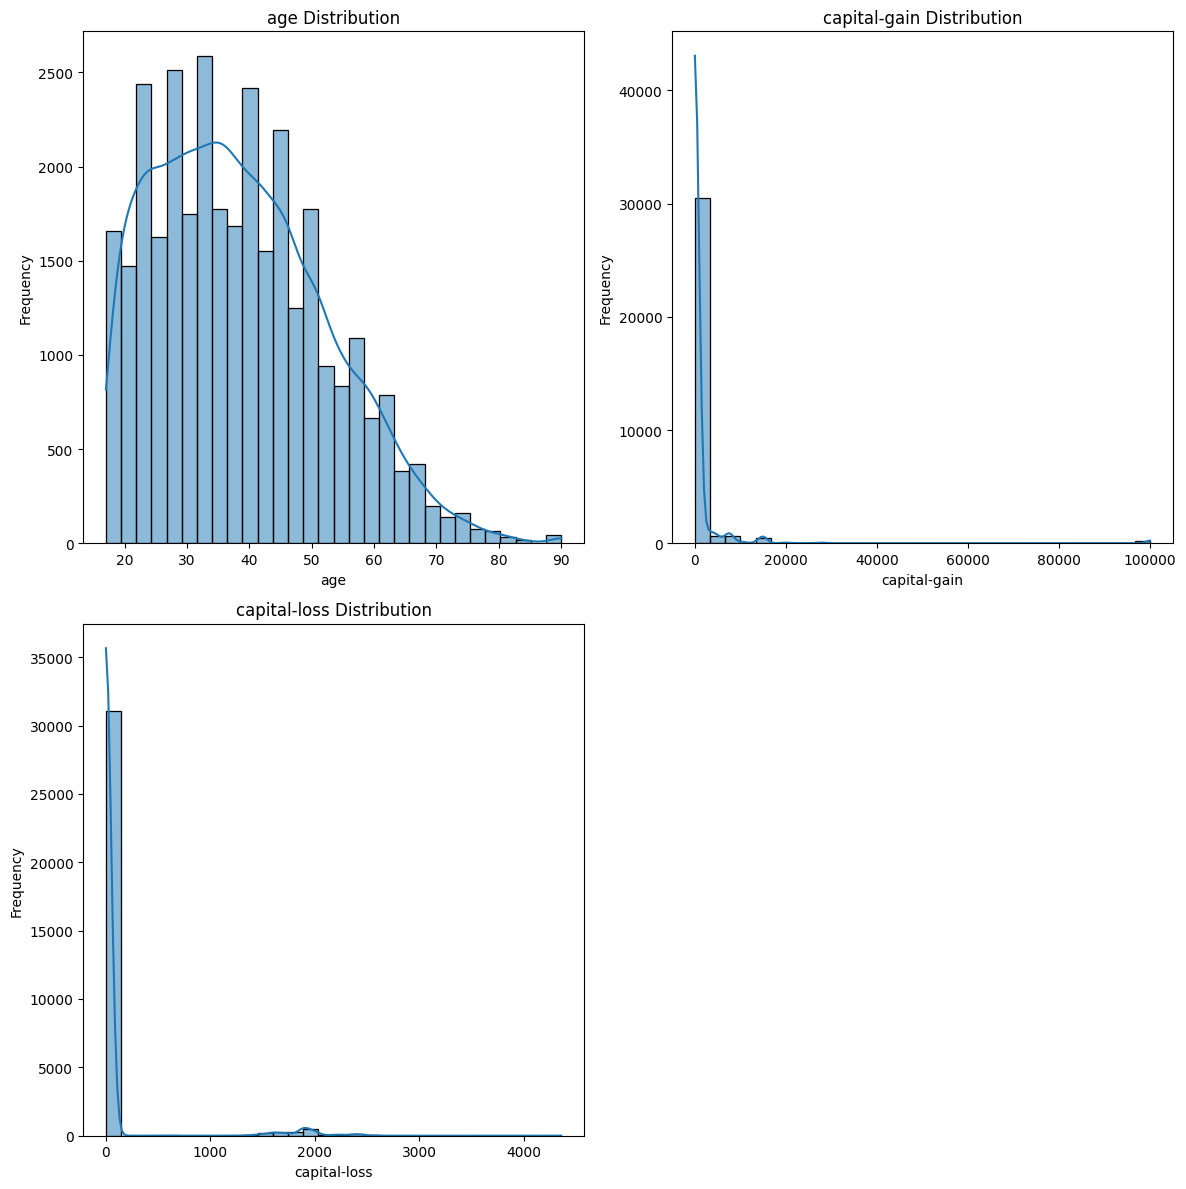

In [39]:
# Plot histograms for at least three numerical columns

numerical_columns = ["age", "capital-gain", "capital-loss"]

plt.figure(figsize=(12, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

*Scurtă interpretare a distribuților*

Se poate observa o ușoară asimetrie spre dreapta pentru 'Age Distribution' , distribuția vârstei prezentând un singur mod, situat între 25 și 40 de ani.

Pentru 'Capital-Gain Distribution' se poate vedea o puternică asimetrie spre dreapta. Multe valori de date fiind concentrate la 0. Modalitatea este una bimodală, cu 2 vârfuri la 0 și aproape de capătul de coadă.

Se pot face același afirmații anterior menționate la 'Capital-Gain Distribution'și pentru 'Capital-Loss Dsitribution'.

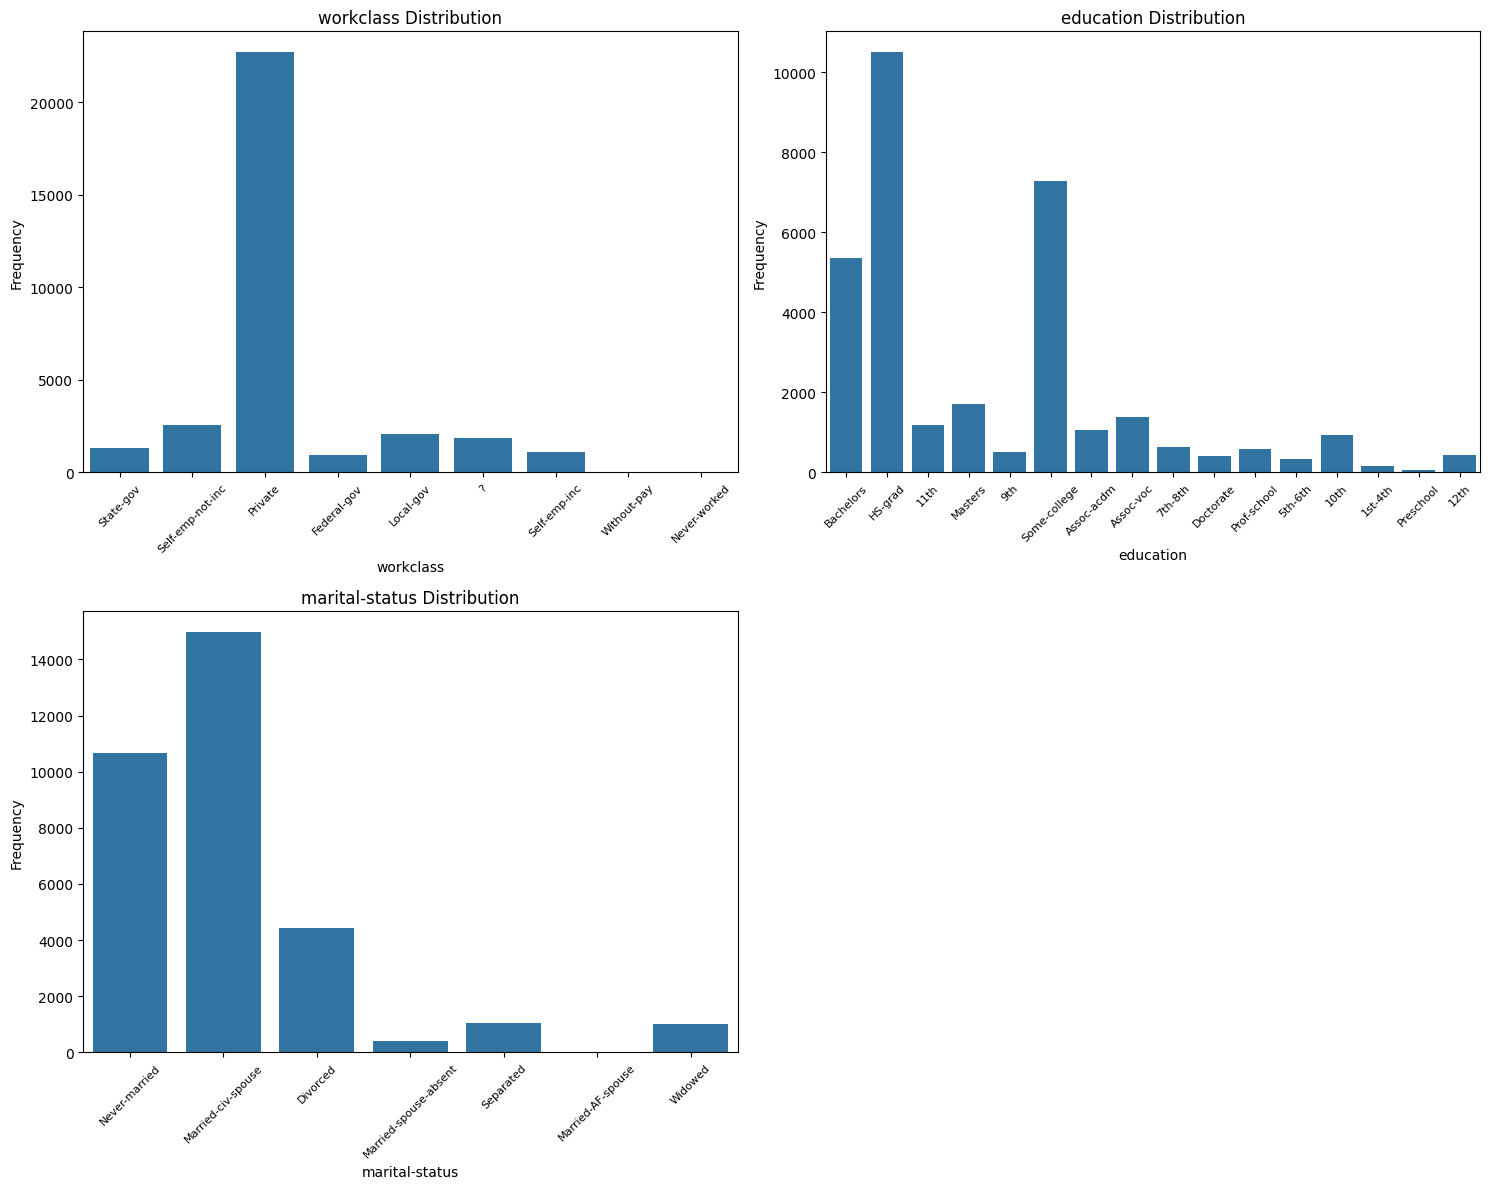

In [40]:
#Bar plots for at least three categorical columns

categorical_columns = ['workclass', 'education', 'marital-status']
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    data_no_na = data.dropna(subset=[col])
    ax = sns.countplot(x=col, data=data_no_na)

    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.9)  
plt.tight_layout() 
plt.show()

*Scurtă interpretare a frecevnțelor distribuției coloanele categoriale alese*

În cadrul distribuției coloanei 'workclass' se poate vedea o predominanță asupra angajațiilor din sectorul privat și frecvențe reduse pentru cei care nu au lucrat niciodată sau care sunt fără paltă.

Pentru 'education' se întâlnește o rată ridicată a subiecților cu studii superioare precum cel de licență și studii liceale.

Iar în cazul distribuției valorilor coloanei'marital-status' categoriile cu cea mai mare frecvență sunt subiecții care nu au fost niciodată căsătoriți și cei căsătoriți.

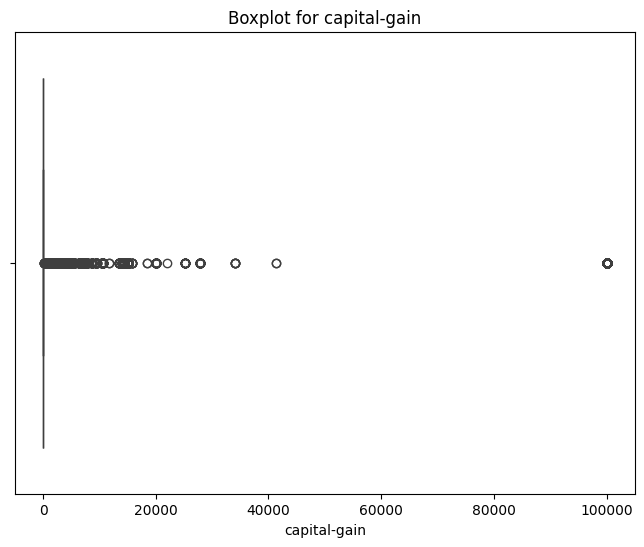

In [41]:
#Identify outliers in at least one numerical column using boxplots

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['capital-gain'])
plt.title('Boxplot for capital-gain')
plt.xlabel('capital-gain')
plt.show()

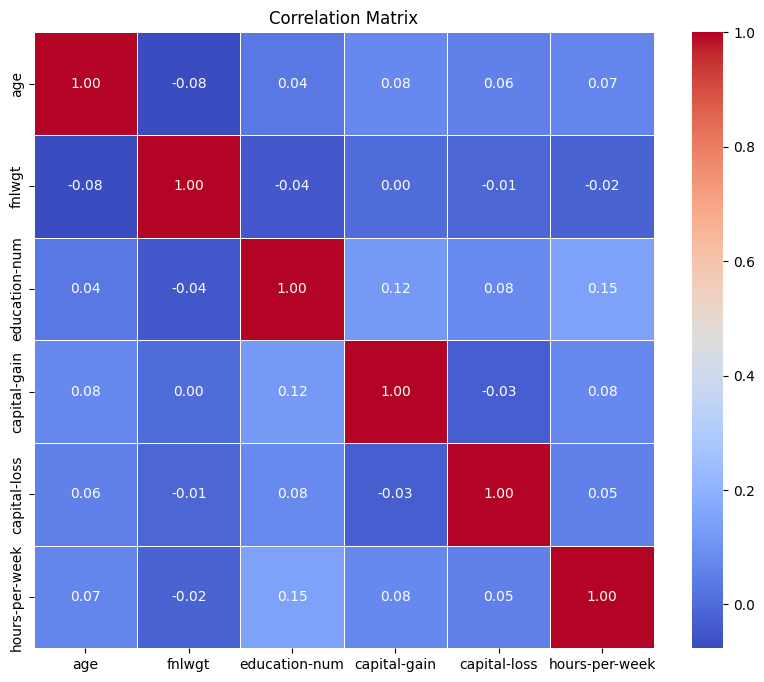

In [42]:
#Correlation matrix for target hours-per-week and the rest of numerical variables 
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

*Scurtă interpretare a corelațiilor*

Pe baza graficului, deși moderată, cea mai puternică și pozitivă corelație cu 'hours-per-week' este 'education num'. După aceste date s-ar putea preciza că persoanele cu un nivel de educație mai ridicat tind să lucreze mai multe ore pe săptămână.

La polul opus, corelația negativă cea mai puternic este cu 'fnlwgt' prezentând o valoare de -0.02.

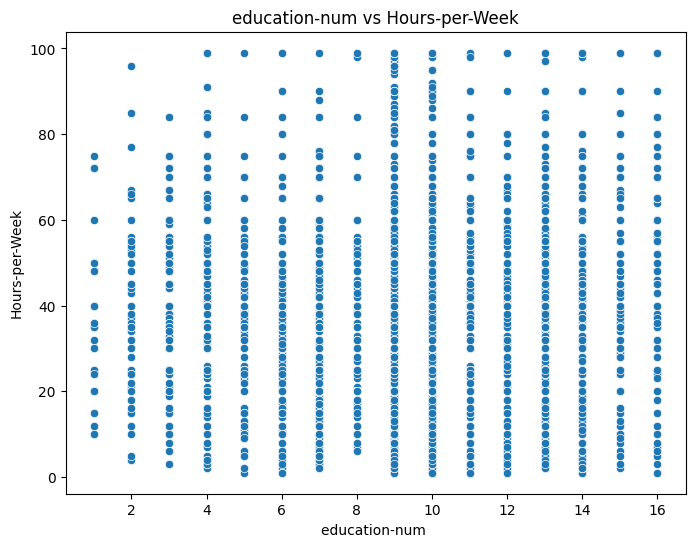

In [43]:
#Explore relationships between at least one numerical variable and hours-per-week target 
 ##using scatter plots and identify any visible trends
 # Choose the variable that is/are most correlated with hours-per-week.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['education-num'], y=data['hours-per-week'])
plt.title('education-num vs Hours-per-Week')
plt.xlabel('education-num ')
plt.ylabel('Hours-per-Week')
plt.show()

In [44]:
correlation_with_target = corr_matrix['hours-per-week'].sort_values(ascending=False)
print("\nCorrelation with hours-per-week:")
print(correlation_with_target)


Correlation with hours-per-week:
hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64


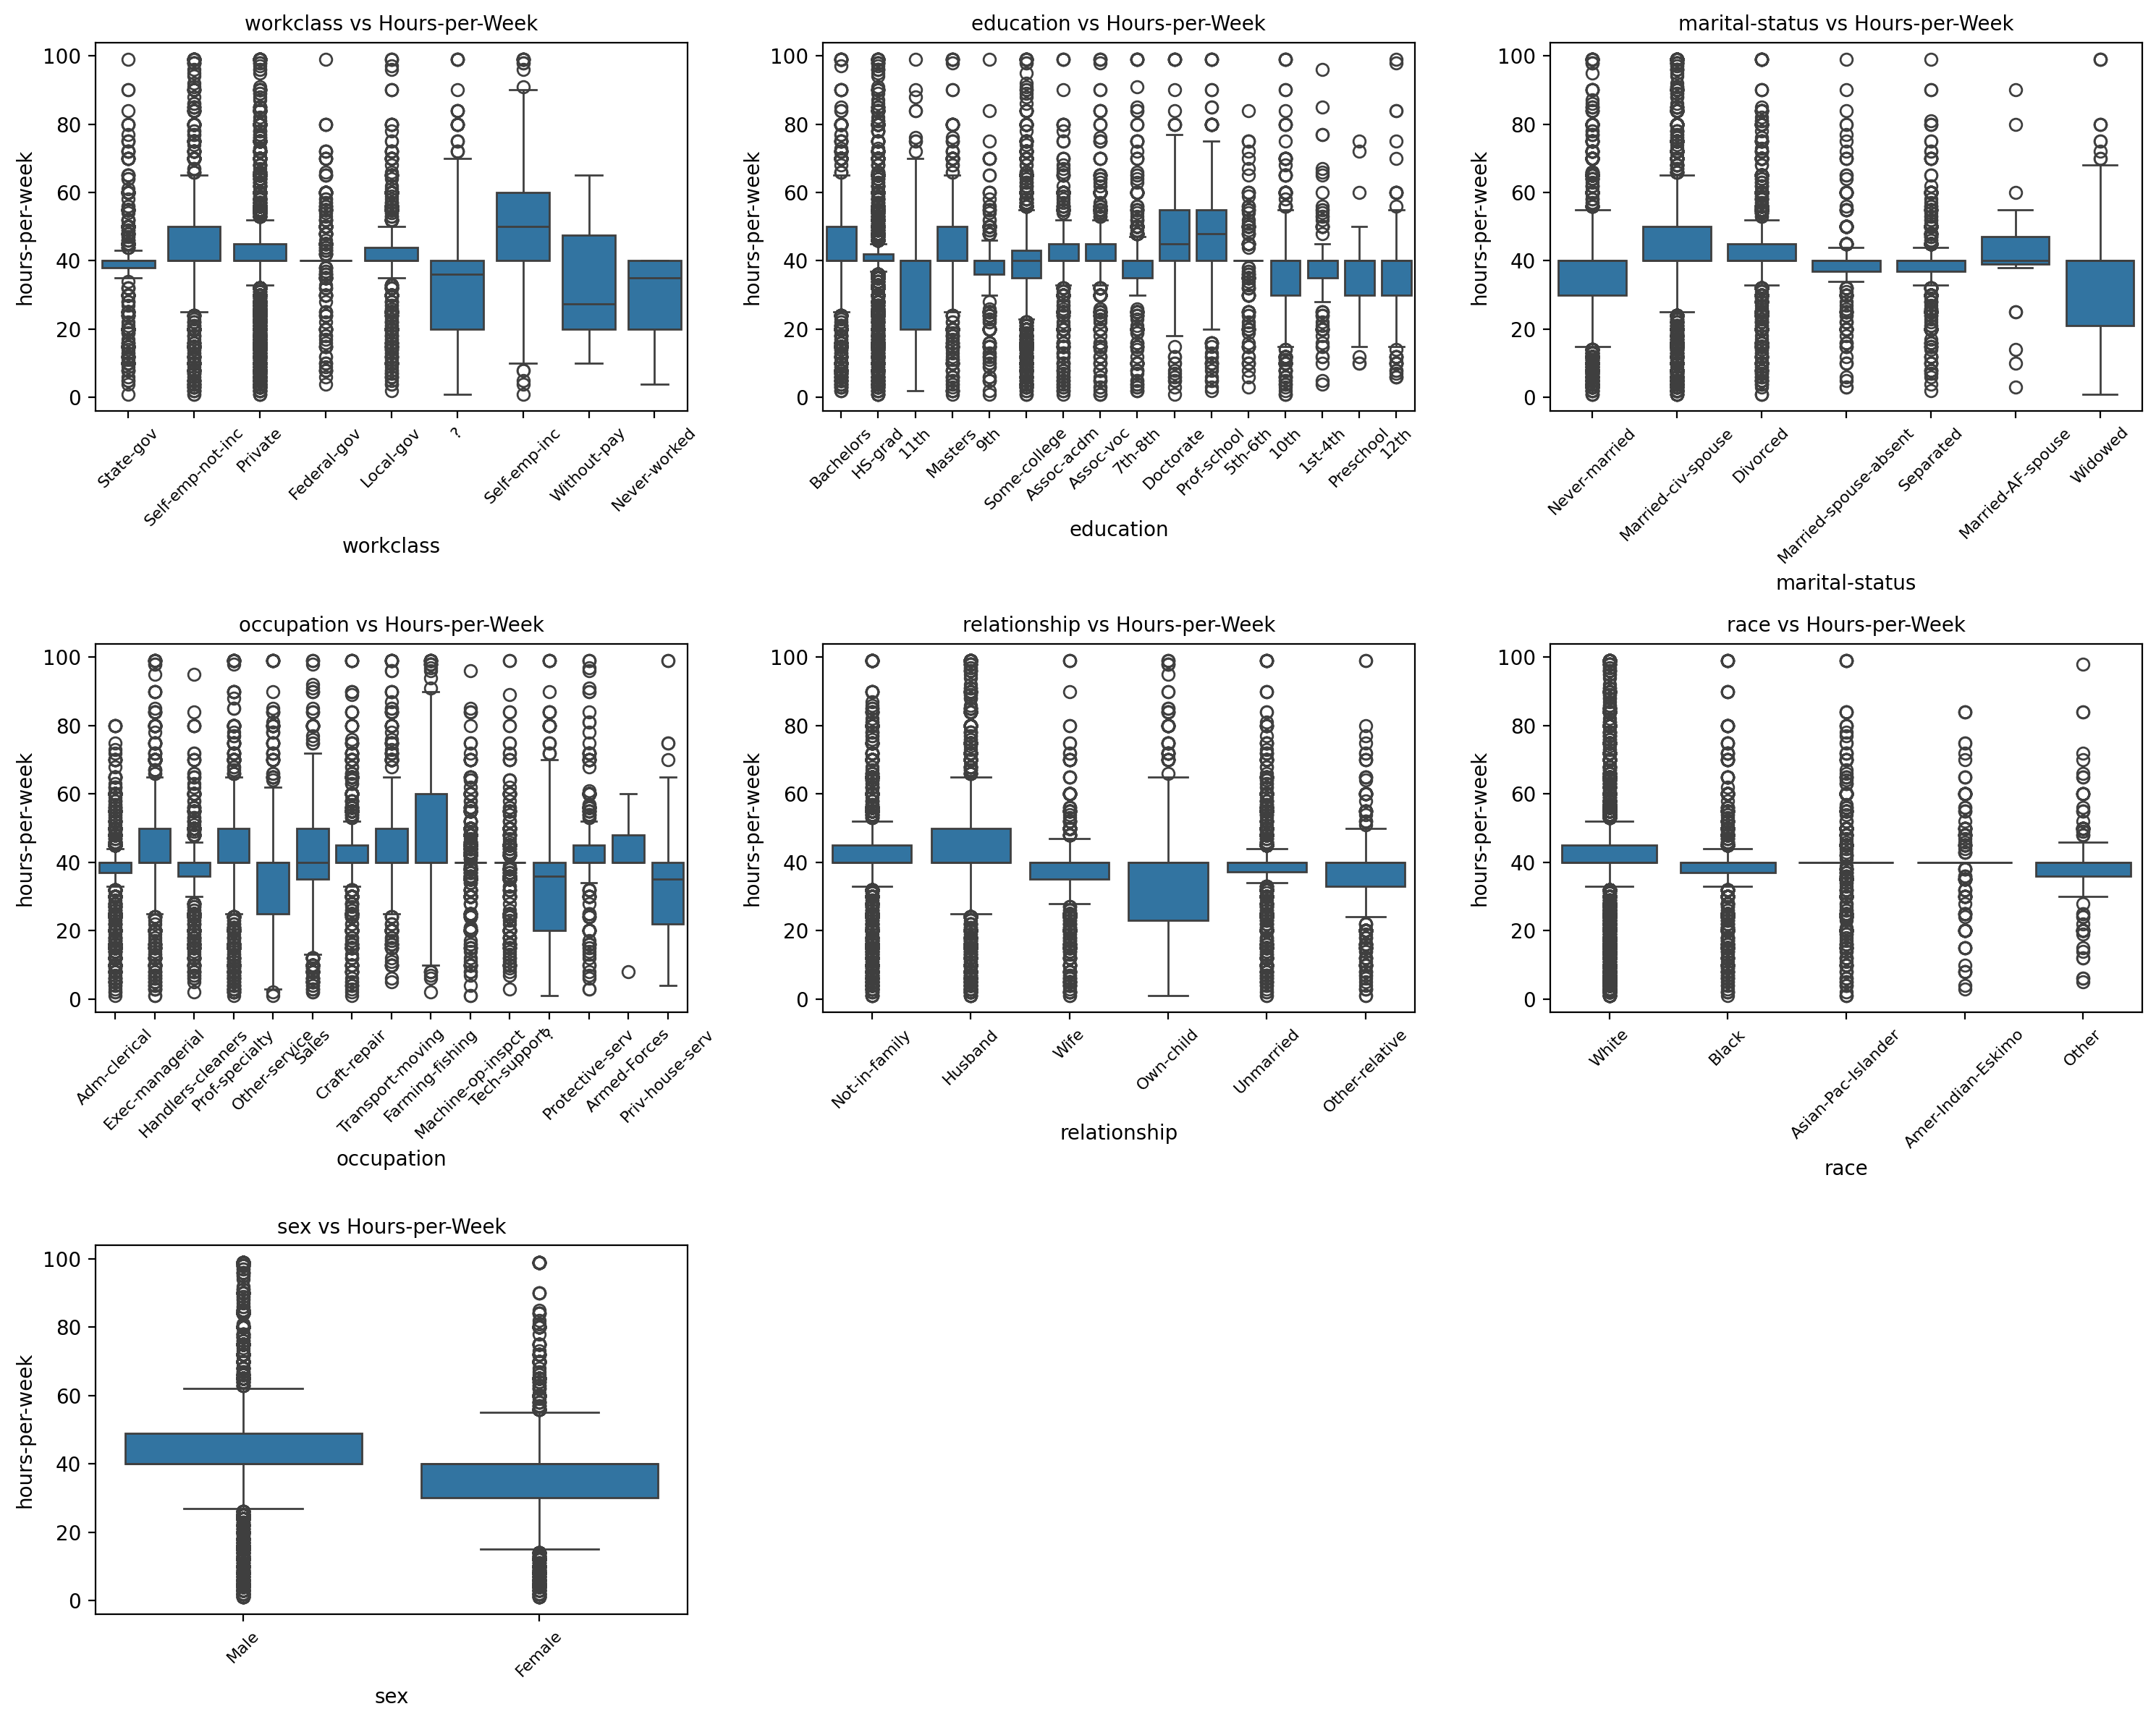

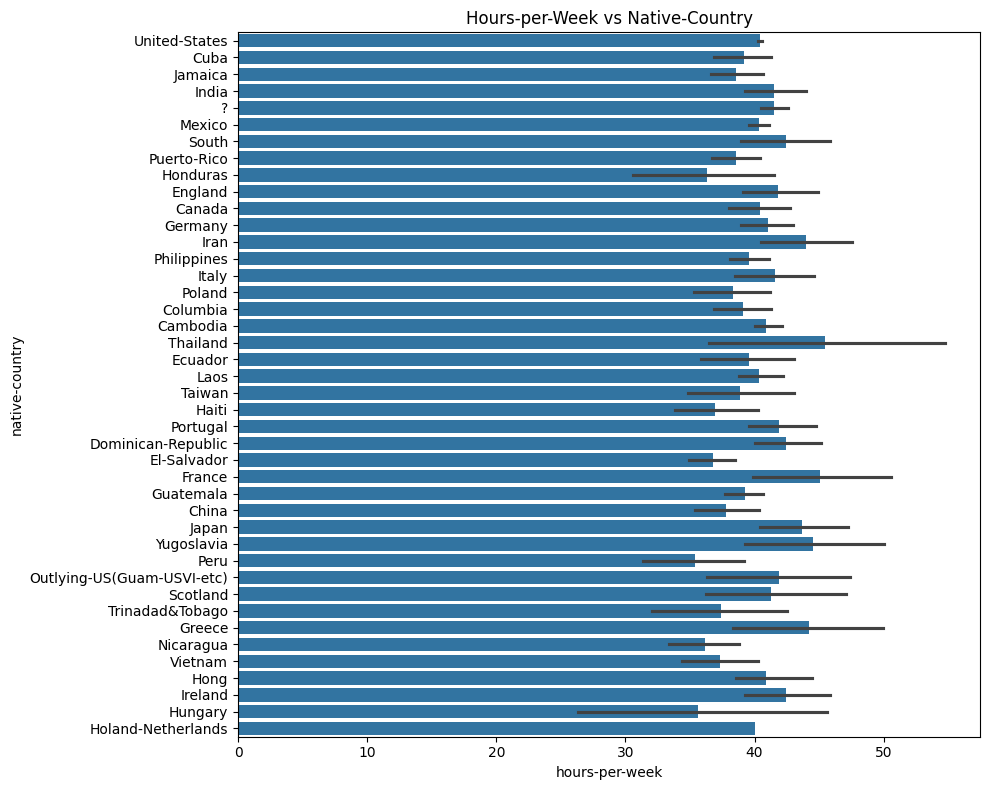

In [45]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']  # Fără 'native-country' aici

plt.figure(figsize=(15, 12), dpi=200)

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='hours-per-week', data=data)
    plt.title(f'{col} vs Hours-per-Week', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.subplots_adjust(bottom=0.2)

plt.tight_layout()


# Am creat separat graficul 'native-country' pentru a putea fi citibil
plt.figure(figsize=(10, 8))  # Ajustăm dimensiunea figurii
sns.barplot(x='hours-per-week', y='native-country', data=data, orient='h')
plt.title('Hours-per-Week vs Native-Country')
plt.tight_layout()
plt.show()  

**Summary report**

Considerănd variabila 'hours-per-week' se poaet evdea o majoritate de oameni care  lucrează în jur de 40 de ore pe săptămână. Aceasta fiind puternic corelată cu variabila 'edcuation-num'.

 De asemenea, distribuțiile variabilelor numerice arată asimetrie puternică în capital-gain și capital-loss, majoritatea valorilor fiind zero.

Pentru posibile invetsigații viitoare aș insista în mod deosebit asupra outlierilor.